### Outlier (Aykırı) Verileri Çıkartma
Aykırı veriler, veri setinde diğer gözlemlerden önemli ölçüde farklı olan veri noktalarıdır. Bunları belirlemek için standart sapma veya IQR (Interquartile Range) yöntemleri kullanılabilir.

Standart Sapma Yöntemi ile Outlier Çıkartma
Bu yöntemde, bir sütundaki verilerin ortalama değerine göre belirli bir standart sapma dışına çıkan veri noktaları aykırı olarak kabul edilir. Aşağıdaki kod, bir sütundaki outlier verileri temizler:

In [1]:
# Veri manipülasyonu, matematiksel hesaplamalar, veri görselleştirme ve veri analizinde kullanılacak kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Şehir isimleri ve sıcaklık değerlerinden oluşan bir veri sözlüğü tanımlama
veri = {
    'sehir': ['Istanbul', 'Ankara', 'Izmir', 'Bursa', 'Antalya', 'Konya', 'Adana'],
    'sicaklik': [19,18,20,18,20,19,32]
}

# Sözlüğü DataFrame yapısına çevirme
df = pd.DataFrame(veri)
print (df)

      sehir  sicaklik
0  Istanbul        19
1    Ankara        18
2     Izmir        20
3     Bursa        18
4   Antalya        20
5     Konya        19
6     Adana        32


In [6]:
# Standart sapma yöntemine göre outlier (aykırı) verileri çıkartmak için fonksiyon tanımlama

def aykiri_degerleri_cikart(df, sutun_adi, m=2):
  ort = df[sutun_adi].mean()  # Sütun ortalamasını hesapla
  std = df[sutun_adi].std()   # Sütun için standart sapmayı hesapla
  kesme_degeri = std * m      # Outlier sınırı için çarpan ile kesme değeri belirle
  alt_sinir, ust_sinir = ort - kesme_degeri, ort + kesme_degeri  # Alt ve üst sınırları belirle
  # Aykırı değerleri dışarıda bırakacak şekilde veriyi filtrele
  filtrelenmis = df[(df[sutun_adi] >= alt_sinir) & (df[sutun_adi] <= ust_sinir)]
  return filtrelenmis  # Aykırı değerler olmadan DataFrame döndür

# `sicaklik` sütunundaki aykırı değerleri çıkartarak yeni bir DataFrame oluşturma
aykiri_degerleri_cikart(df, 'sicaklik')

,sehir,sicaklik
0,Istanbul,19
1,Ankara,18
2,Izmir,20
3,Bursa,18
4,Antalya,20
5,Konya,19


#### IQR Yöntemi ile Outlier Çıkartma
IQR yöntemi, verilerin %25 ile %75 arasındaki dilimini dikkate alarak, bu sınırların dışında kalan verileri aykırı olarak değerlendirir:

In [7]:
# IQR (Interquartile Range) yöntemine göre outlier (aykırı) değerleri çıkartmak için fonksiyon
def aykiri_degerler_iqr(df, sutun_adi):
  Q1 = df[sutun_adi].quantile(0.25)  # İlk çeyrek (Q1) değerini hesapla
  Q3 = df[sutun_adi].quantile(0.75)  # Üçüncü çeyrek (Q3) değerini hesapla
  IQR = Q3 - Q1  # IQR (Q3 - Q1) aralığını hesapla
  alt_sinir = Q1 - 1.5 * IQR  # Alt sınır = Q1 - 1.5 * IQR
  ust_sinir = Q3 + 1.5 * IQR  # Üst sınır = Q3 + 1.5 * IQR
  # Belirlenen sınırların dışında kalan aykırı değerleri filtrele
  filtrelenmis = df[(df[sutun_adi] >= alt_sinir) & (df[sutun_adi] <= ust_sinir)]
  return filtrelenmis  # Aykırı değerler olmadan DataFrame döndür

# `sicaklik` sütunundaki IQR yöntemi ile aykırı değerleri çıkartarak yeni bir DataFrame oluşturma
ayrikisiz_df = aykiri_degerler_iqr(df, 'sicaklik')
ayrikisiz_df  # Sonucu ekrana yazdırma

,sehir,sicaklik
0,Istanbul,19
1,Ankara,18
2,Izmir,20
3,Bursa,18
4,Antalya,20
5,Konya,19


#####  Kayıp verilerin nasıl işleneceğine dair örnek veri seti oluşturma


### Null (Eksik) Verileri İşleme

Eksik veriler, veri setinde bulunan boş veya tanımlanmamış değerlerdir. Bu değerleri doldurmak için bazı yaygın yöntemler kullanılır:

In [8]:
data = {
    'yas': [25,30,np.nan,35,28,np.nan,42],  # Bazı yaş bilgileri eksik
    'cinsiyet': ['erkek', 'kadin', np.nan, 'kadin', 'erkek', 'kadin', np.nan],  # Bazı cinsiyet değerleri eksik
    'meslek': ['muhendis', 'doktor', 'ogretmen', 'avukat', 'doktor', 'muhendis', np.nan],  # Bazı meslek bilgileri eksik
    'deneyim': [2,5,10,np.nan,8,3,15]  # Bazı deneyim bilgiler eksik
}

# Veriyi DataFrame yapısına çevirme
df = pd.DataFrame(data)
df  # DataFrame'i ekrana yazdırma

,yas,cinsiyet,meslek,deneyim
0,25.0,erkek,muhendis,2.0
1,30.0,kadin,doktor,5.0
2,NaN,NaN,ogretmen,10.0
3,35.0,kadin,avukat,NaN
4,28.0,erkek,doktor,8.0
5,NaN,kadin,muhendis,3.0
6,42.0,NaN,NaN,15.0


##### Eksik Verileri Yüzdelik Olarak Görüntüleme
Eksik değerlerin oranını göstermek için:

In [10]:
# DataFrame'deki her bir sütunda bulunan eksik veri oranını yüzdelik olarak hesaplamak için fonksiyon
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)  # Eksik veri oranlarını yüzdelik olarak hesapla
  percent_nan = percent_nan[percent_nan > 0].sort_values()  # Sadece eksik veri içeren sütunları sırala
  return percent_nan  # Eksik veri oranlarını döndür

# Kayıp veri yüzdesini hesaplayarak sakla ve ekrana yazdır
percent_nan = percent_missing(df)
percent_nan

meslek      14.285714
deneyim     14.285714
yas         28.571429
cinsiyet    28.571429
dtype: float64

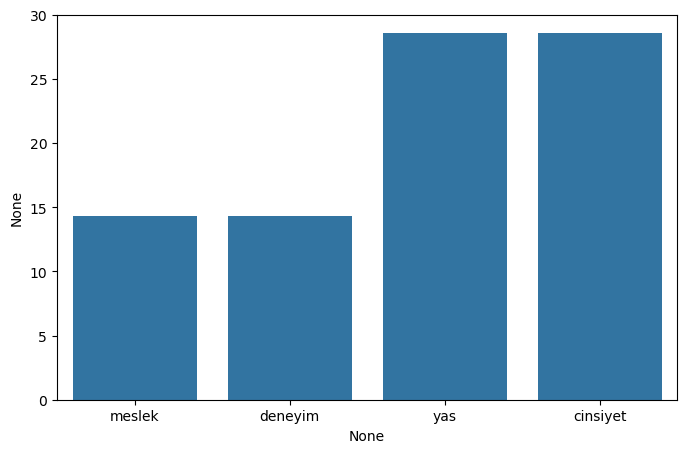

In [11]:
# Kayıp veri oranlarını görselleştirmek için çubuk grafiği çizme
plt.figure(figsize=(8,5))  # Grafik boyutunu ayarla
sns.barplot(x=percent_nan.index, y=percent_nan)  # Eksik veri oranlarını çubuk grafikte göster
plt.show()  # Grafiği görüntüle

##### Eksik Verileri Doldurma
Eksik verileri doldurmak için örneğin cinsiyet veya meslek gibi kategorik sütunlara "None" atayabiliriz. Sayısal sütunlar içinse ortalama, medyan ya da belirli bir sayı kullanılabilir:

In [13]:
df['cinsiyet'] = df['cinsiyet'].fillna('None')  # Cinsiyet sütunundaki boş verileri 'None' ile doldur
df['meslek'] = df['meslek'].fillna('None')  # Meslek sütunundaki boş verileri 'None' ile doldur
df['deneyim'] = df['deneyim'].fillna(0)  # Deneyim sütunundaki boş verileri 0 ile doldur

# yaş gibi sayısal verileri grup ortalaması ile doldurmak mantıklı olabilir.

df['yas'] = df['yas'].fillna(df.groupby('cinsiyet')['yas'].transform('mean'))  # Cinsiyete göre yaş ortalamaları ile doldur

df

,yas,cinsiyet,meslek,deneyim
0,25.0,erkek,muhendis,2.0
1,30.0,kadin,doktor,5.0
2,42.0,None,ogretmen,10.0
3,35.0,kadin,avukat,0.0
4,28.0,erkek,doktor,8.0
5,32.5,kadin,muhendis,3.0
6,42.0,None,None,15.0


#### Kategorik Veriler

In [14]:
# Kategorik değişkenleri dummy (sahte) değişkenlere çevirme örneği
df_dummies = pd.get_dummies(df['cinsiyet'])  # `cinsiyet` sütunundaki kategorileri 0 ve 1 olarak kodlama
df_dummies  # Dummy değişkenleri ekrana yazdırma

,None,erkek,kadin
0,False,True,False
1,False,False,True
2,True,False,False
3,False,False,True
4,False,True,False
5,False,False,True
6,True,False,False


In [15]:
# Dummy değişkenleri int türünde oluşturma
df_dummies = pd.get_dummies(df['cinsiyet'], dtype=int)
df_dummies  # Sonucu ekrana yazdırma

,None,erkek,kadin
0,0,1,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0


### Titanic veri setini CSV dosyasından okuma



In [ ]:
# Titanic veri setini CSV dosyasından okuma
df = pd.read_csv('titanic.csv')
df  # Titanic veri setini ekrana yazdırma

# Titanic veri setinde sütun isimlerini Türkçeye çevirme işlemi
yeni_sutunlar = {
    'PassengerId': 'yolcuId',
    'Survived': 'hayattaMi',
    'Pclass': 'biletSinifi',
    'Name': 'isim',
    'Sex': 'cinsiyet',
    'Age': 'yas',
    'SibSp': 'kardesVeEs',
    'Parch': 'ebeveynCocuk',
    'Ticket': 'biletNo',
    'Fare': 'ucret',
    'Cabin': 'kabin',
    'Embarked': 'liman'
}

# Yeni sütun adlarını veri çerçevesine uygulama
df.rename(columns=yeni_sutunlar, inplace=True)
df  # Güncellenmiş DataFrame'i ekrana yazdırma

# Titanic veri setinin bilgi özetini görüntüleme
df.info()

# Titanic veri setinin boyutunu gösterme
df.shape

# Sayısal sütunları seçme
num_col = df.select_dtypes(include='number')
num_col  # Sayısal sütunları ekrana yazdırma

# Sayısal sütunların istatistiksel özetini görüntüleme
df.describe().T

# Kategorik sütunları seçme
cat_col = df.select_dtypes(include='object')
cat_col  # Kategorik sütunları ekrana yazdırma

# Kategorik sütunlarda eksik veri sayısını bulma
cat_col.isnull().sum()

# Tüm veri çerçevesindeki eksik verileri bulma
df.isnull().sum()

# Sayısal sütunların korelasyon matrisini hesaplama
num_col.corr()

# `yas` sütunundaki eksik değerleri bilet sınıfına göre median ile doldurma
medyan_yaslar = df.groupby('biletSinifi')['yas'].transform('median')
df['yas'] = df['yas'].fillna(medyan_yaslar)
df.isnull().sum()

# `kabin` sütununu veri çerçevesinden çıkarma (kayıp veri oranı yüksek)
df = df.drop(['kabin'], axis=1)
df.isnull().sum()

# Liman sütunundaki eksik verileri 'S' değeriyle doldurma
df['liman'] = df['liman'].fillna('S')
df.isnull().sum()

# Korelasyon matrisinde hayatta kalma durumuna göre korelasyonları sıralama
num_col.corr()['hayattaMi'].sort_values()

# Hayatta kalma durumuna göre ücret dağılımını görselleştirme
sns.scatterplot(x='hayattaMi', y='ucret', data=df)
plt.show()

# `ucret` sütununda 300'den büyük aykırı değerleri çıkarma
filtrelenmis = df[df['ucret'] > 300].index
df = df.drop(filtrelenmis, axis=0)

# Ücret dağılımını yeniden görselleştirme
sns.scatterplot(x='hayattaMi', y='ucret', data=df)
plt.show()

# Ücret değişkeni için boxplot ve histogram görselleştirmesi
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df['ucret'])  # Ücret değişkeni için boxplot çizme
plt.title('Ucret-Boxplot')

plt.subplot(1,2,2)
sns.histplot(df['ucret'], bins=30)  # Ücret değişkeni için histogram çizme
plt.title('Ucret-histogram')
plt.show()

# Ücret sütunundaki aykırı değerleri standart sapma yöntemi ile çıkartma
df = aykiri_degerleri_cikart(df, 'ucret')

# Güncellenmiş ücret dağılımı için boxplot ve histogram çizme
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df['ucret'])
plt.title('Ucret-Boxplot')

plt.subplot(1,2,2)
sns.histplot(df['ucret'], bins=30)
plt.title('Ucret-histogram')
plt.show()

# `ucret` sütununda IQR yöntemi ile aykırı değerleri çıkartma
df = aykiri_degerler_iqr(df, 'ucret')

# Güncellenmiş ücret dağılımı için görselleştirme
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(df['ucret'])
plt.title('Ucret-Boxplot')

plt.subplot(1,2,2)
sns.histplot(df['ucret'], bins=30)
plt.title('Ucret-histogram')
plt.show()

# İlk beş satırı gösterme
df.head()

# Kategorik değişkenleri dummy değişkenlere çevirme
df = pd.get_dummies(df, columns=['cinsiyet', 'liman'])
df  # Dummy değişkenleri içeren DataFrame'i gösterme